# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 28 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

import warnings
warnings.simplefilter("ignore")

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.

---
### Задача 1.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
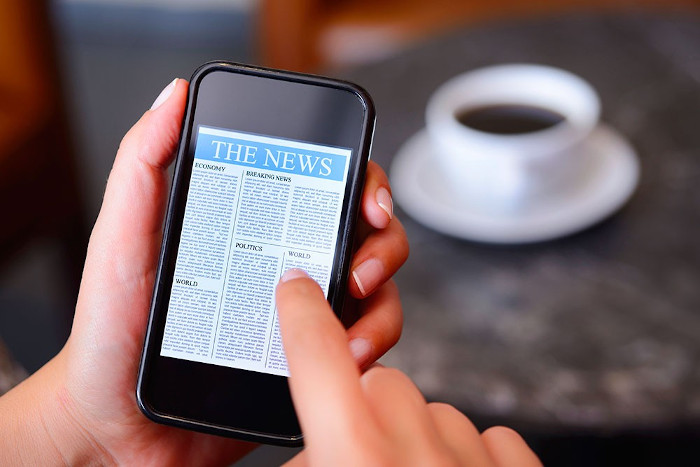



Перед выполнением задачи обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [3]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [4]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [5]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [6]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Преобразуем сначало данные в Pandas

In [7]:
df = pd.DataFrame()
df['text'] = pd.DataFrame(data_train['data'])
df['category'] = pd.DataFrame(data_train['target'])
df.head()

,text,category
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


Разделим датасет на обучающий и валидационный

In [8]:
df_train, df_valid = train_test_split(df, test_size=0.2, random_state =37372114)
print(df_train.shape, df_valid.shape)

(9051, 2) (2263, 2)


Предобработаем данные перед передачей их в модель. Постараемся заметить некоторую зависимость между текстами и категориями.

Вполне логично преположить, что в одинаковые отделы новостей пишут люди с похожим образом речи, значит скорее всего количесвто знаков припенания зависят от категории. Давайте проверим это.

In [9]:
df_train['frec_of_coma'] = df_train['text'].apply(lambda x : x.count(',') / (len(x) + 1))
df_train['frec_of_point'] = df_train['text'].apply(lambda x : x.count('.') / (len(x) + 1))
df_train['frec_of_!'] = df_train['text'].apply(lambda x : x.count('!') / (len(x) + 1))

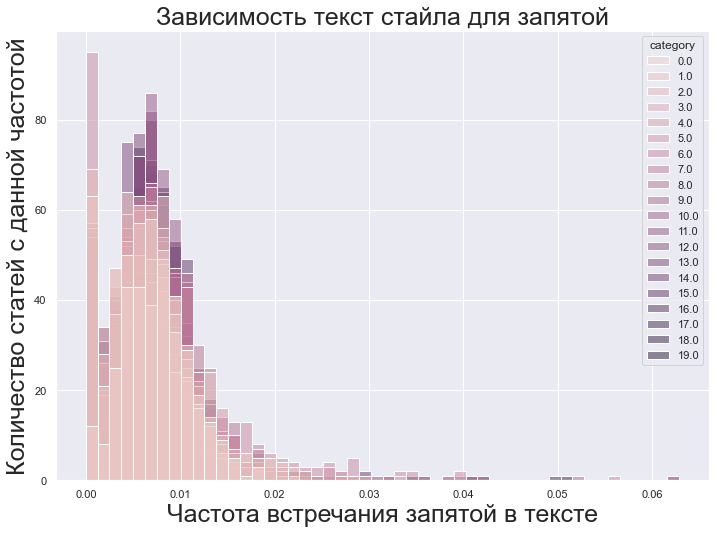

In [10]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
graph = sns.histplot(data=df_train.where(df_train["frec_of_coma"] < 0.1).dropna(), x="frec_of_coma", hue="category", bins = 50)
graph.set_title("Зависимость текст стайла для запятой", size = 25)
graph.set_xlabel("Частота встречания запятой в тексте", size = 25)
graph.set_ylabel("Количество статей с данной частотой", size = 25);

Очевидно что зависимости нет. Повторим наши дейтсвия для точки и для восклицательного знака.

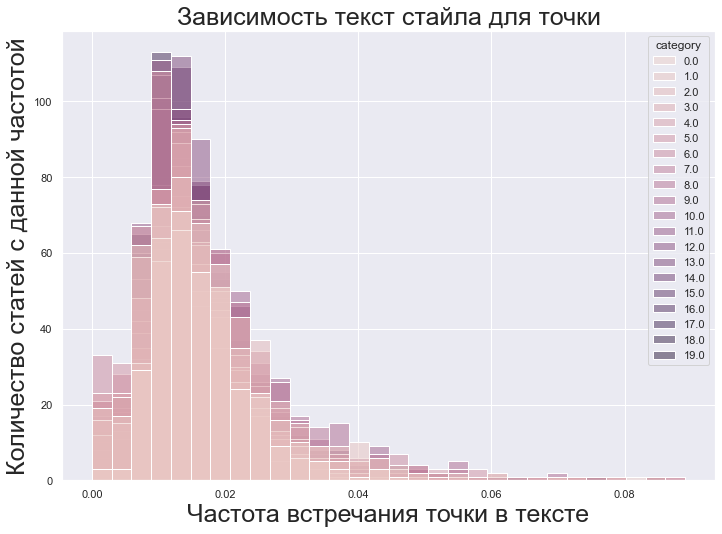

In [11]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
graph = sns.histplot(data=df_train.where(df_train['frec_of_point'] < 0.1).dropna(), x="frec_of_point", hue="category", bins = 30)
graph.set_title("Зависимость текст стайла для точки", size = 25)
graph.set_xlabel("Частота встречания точки в тексте", size = 25)
graph.set_ylabel("Количество статей с данной частотой", size = 25);

Опять же сложно что-либо предсказать. Повторим опыт для восклицательных знаков

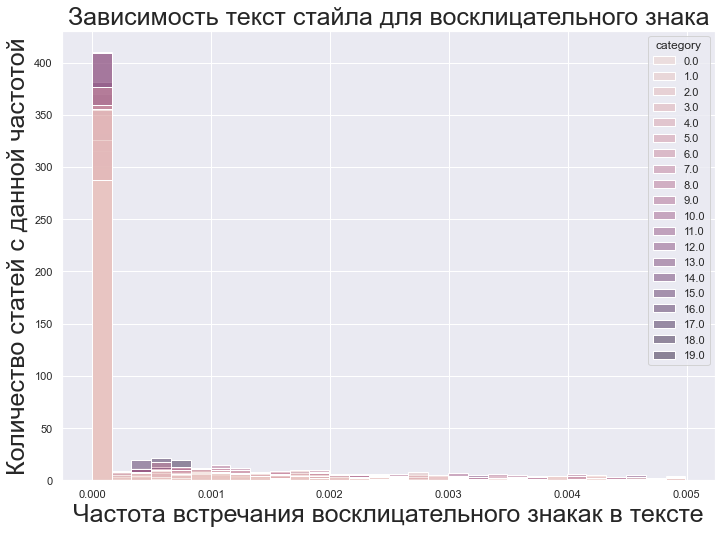

In [12]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
graph = sns.histplot(data=df_train.where(df_train['frec_of_!'] < 0.005).dropna(), x="frec_of_!", hue="category", bins = 30)
graph.set_title("Зависимость текст стайла для восклицательного знака", size = 25)
graph.set_xlabel("Частота встречания восклицательного знакак в тексте", size = 25)
graph.set_ylabel("Количество статей с данной частотой", size = 25);

Вообще никакой инфы(. Грустно, постораемся провести словестно-частотный анализ текста, как на занятиях.

In [ ]:
my_vectorise = CountVectorizer()
transform_data_train = my_vectorise.fit_transform(df_train['text']).toarray()
transform_data_valid = my_vectorise.transform(df_valid['text']).toarray()
multinomial_nb = MultinomialNB()
multinomial_nb.fit(transform_data_train, df_train['category'])
predictions = multinomial_nb.predict(transform_data_valid)
predictions

К сожелению, из-за того что я делал дз в последний момент я не успел его доделать. Отсылаю то чем богаты

Сделайте выводы.

---
### Задача 2.
Пусть $\mathscr{X} = \mathbb{R}^2$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ. Условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

Пример параболы гиперболы есть в ноутбуке с занятий.